In [38]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
# read dataset
male_ankle_run  = pd.read_csv("./clean_dataset/clean_male_ankle_run.csv", parse_dates=['time'])
male_ankle_walk = pd.read_csv("./clean_dataset/clean_male_ankle_walk.csv", parse_dates=['time'])

In [40]:
# Process the dataset
run_data    = male_ankle_run.copy()
walk_data   = male_ankle_walk.copy()

# Add activity tag to collect_data: {0:Walking,1:Running}
walk_data['activity'] = 'Walking'
run_data ['activity'] = 'Running'

# Calculate the accelerated speed
run_data['acceleration'] = np.sqrt((run_data['ax'])**2 + (run_data['ay'])**2 + (run_data['az'])**2)
walk_data['acceleration'] = np.sqrt((walk_data['ax'])**2 + (walk_data['ay'])**2 + (walk_data['az'])**2)

# random drop data(undersample)
undersample_walk_data = walk_data.sample(n=11500)

# random add data(oversample)
temp = run_data.sample(n=10000)
oversample_run_data = pd.concat([run_data, temp], axis = 0,ignore_index = True)

# concat two dataset
over_collect_data = pd.concat([oversample_run_data, walk_data], axis = 0,ignore_index = True)
under_collect_data = pd.concat([run_data, undersample_walk_data], axis = 0,ignore_index = True)
collect_data = pd.concat([run_data, walk_data], axis = 0,ignore_index = True)

# Delete useless column
collect_data = collect_data.drop('time', axis=1)
collect_data = collect_data.drop('wx', axis=1)
collect_data = collect_data.drop('wy', axis=1)
collect_data = collect_data.drop('wz', axis=1)

# Delete useless column
over_collect_data = over_collect_data.drop('time', axis=1)
over_collect_data = over_collect_data.drop('wx', axis=1)
over_collect_data = over_collect_data.drop('wy', axis=1)
over_collect_data = over_collect_data.drop('wz', axis=1)

under_collect_data = under_collect_data.drop('time', axis=1)
under_collect_data = under_collect_data.drop('wx', axis=1)
under_collect_data = under_collect_data.drop('wy', axis=1)
under_collect_data = under_collect_data.drop('wz', axis=1)

Text(0.5, 1.0, 'Imbalanced data')

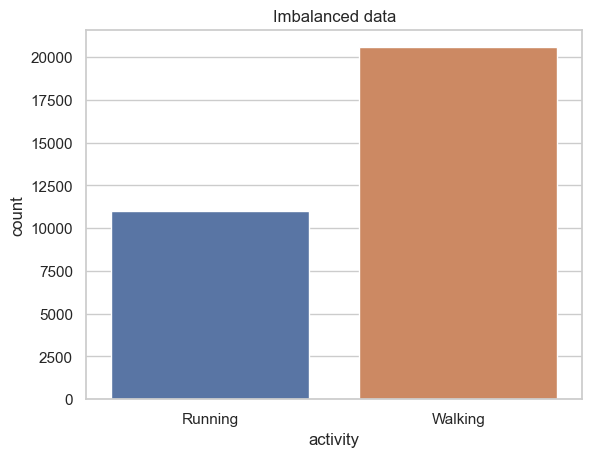

In [41]:
# Check data balance
# code reference: https://seaborn.pydata.org/tutorial/introduction
sns.set_theme(style="whitegrid")
p = sns.countplot(x=collect_data["activity"])
p.set_title("Imbalanced data")

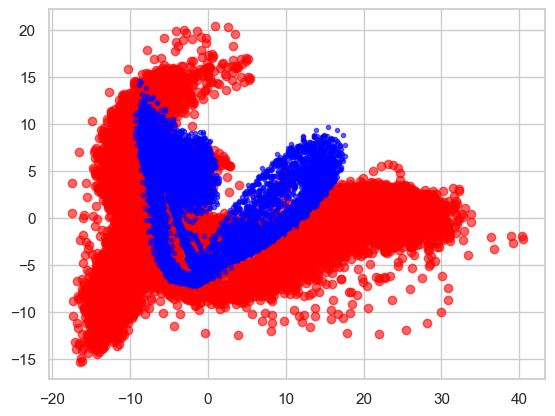

In [87]:
from sklearn.decomposition import PCA


walkpoint = walk_data.copy().drop('time', axis=1).head(10000)
runpoint = run_data.copy().drop('time', axis=1).head(10000)

walkpoint.activity=walkpoint.activity.map({'Walking':0,'Running':1})
runpoint.activity=runpoint.activity.map({'Walking':0,'Running':1})

pca = PCA(n_components=2)
newwalk = pca.fit_transform(walkpoint)
newrun = pca.fit_transform(runpoint)

walkx=newwalk[:,0]  
walky=newwalk[:,1]
runx=newrun[:,0]  
runy=newrun[:,1]

plt.scatter(runx, runy,alpha=0.6,c='red',marker='o')
plt.scatter(walkx, walky,alpha=0.6,c='blue',marker='.')

plt.show()

Text(0.5, 1.0, 'Oversampling')

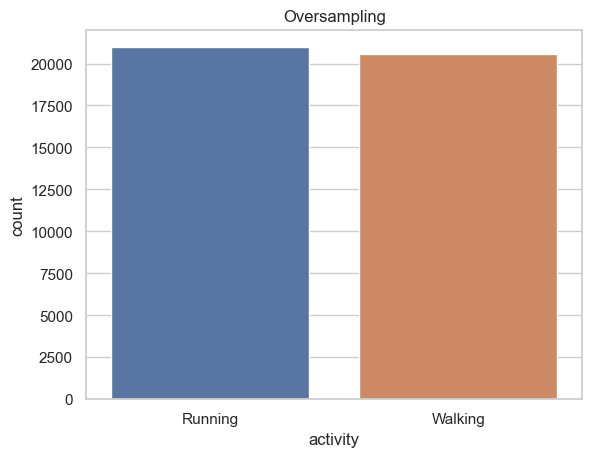

In [5]:
# Check data balance
# code reference: https://seaborn.pydata.org/tutorial/introduction
sns.set_theme(style="whitegrid")
p = sns.countplot(x=over_collect_data["activity"])
p.set_title("Oversampling")

Text(0.5, 1.0, 'Undersampling')

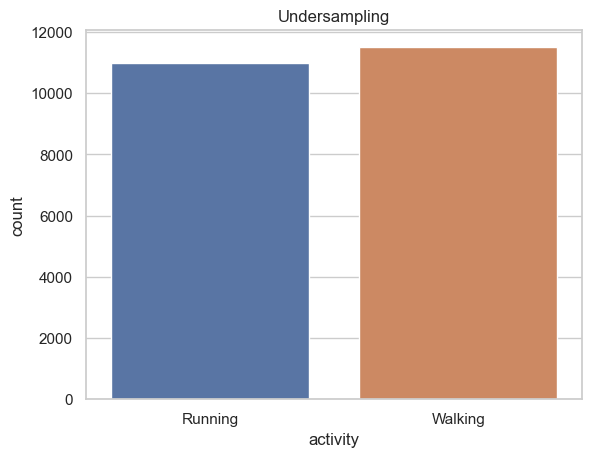

In [6]:
# Check data balance
# code reference: https://seaborn.pydata.org/tutorial/introduction
sns.set_theme(style="whitegrid")
p = sns.countplot(x=under_collect_data["activity"])
p.set_title("Undersampling")

In [7]:
# same order
collect_data = collect_data[['gFx', 'gFy', 'gFz', 'ax', 'ay','az', 'activity', 'acceleration']]
under_collect_data = under_collect_data[['gFx', 'gFy', 'gFz', 'ax', 'ay','az', 'activity', 'acceleration']]
over_collect_data  = over_collect_data[['gFx', 'gFy', 'gFz', 'ax', 'ay','az', 'activity', 'acceleration']]

In [8]:
# imbalanced data

X = collect_data.drop('activity', axis=1)
y = collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
RandomForest = RandomForestClassifier(n_estimators=100,
        max_depth=200, min_samples_leaf=10)
RandomForest.fit(X_train, y_train)

print("RandomForest model score on train dataset:")
print(RandomForest.score(X_train, y_train))
print("RandomForest model score on valid dataset:")
print(RandomForest.score(X_valid, y_valid))


# oversample data
X = over_collect_data.drop('activity', axis=1)
y = over_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
RandomForest = RandomForestClassifier(n_estimators=100,
        max_depth=200, min_samples_leaf=10)
RandomForest.fit(X_train, y_train)


print('/n')
print("RandomForest model score on train dataset:")
print(RandomForest.score(X_train, y_train))
print("RandomForest model score on valid dataset:")
print(RandomForest.score(X_valid, y_valid))

# undersample data

X = under_collect_data.drop('activity', axis=1)
y = under_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
RandomForest = RandomForestClassifier(n_estimators=100,
        max_depth=200, min_samples_leaf=10)
RandomForest.fit(X_train, y_train)
print('/n')
print("RandomForest model score on train dataset:")
print(RandomForest.score(X_train, y_train))
print("RandomForest model score on valid dataset:")
print(RandomForest.score(X_valid, y_valid))

y_predict = RandomForest.predict(X_valid)
print(classification_report(y_valid,y_predict))

RandomForest model score on train dataset:
0.9833065674921816
RandomForest model score on valid dataset:
0.9735040567951319
/n
RandomForest model score on train dataset:
0.9859765098517425
RandomForest model score on valid dataset:
0.9811320754716981
/n
RandomForest model score on train dataset:
0.980064079743681
RandomForest model score on valid dataset:
0.9706353443673251
              precision    recall  f1-score   support

     Running       0.98      0.97      0.97      2788
     Walking       0.97      0.98      0.97      2831

    accuracy                           0.97      5619
   macro avg       0.97      0.97      0.97      5619
weighted avg       0.97      0.97      0.97      5619



In [9]:
# imbalanced data
X = collect_data.drop('activity', axis=1)
y = collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)
print("KNN model score on train dataset:")
print(KNNmodel.score(X_train, y_train))
print("KNN model score on valid dataset:")
print(KNNmodel.score(X_valid, y_valid))

# oversample data
X = over_collect_data.drop('activity', axis=1)
y = over_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)
print("KNN model score on train dataset:")
print(KNNmodel.score(X_train, y_train))
print("KNN model score on valid dataset:")
print(KNNmodel.score(X_valid, y_valid))

# undersample data
X = under_collect_data.drop('activity', axis=1)
y = under_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)
print("KNN model score on train dataset:")
print(KNNmodel.score(X_train, y_train))
print("KNN model score on valid dataset:")
print(KNNmodel.score(X_valid, y_valid))

y_predict = KNNmodel.predict(X_valid)
print(classification_report(y_valid,y_predict))

KNN model score on train dataset:
0.9670780153833151
KNN model score on valid dataset:
0.9533468559837728
KNN model score on train dataset:
0.9679417238944868
KNN model score on valid dataset:
0.9570658452060069
KNN model score on train dataset:
0.9603654918713659
KNN model score on valid dataset:
0.9439402028830752
              precision    recall  f1-score   support

     Running       0.95      0.93      0.94      2797
     Walking       0.93      0.96      0.94      2822

    accuracy                           0.94      5619
   macro avg       0.94      0.94      0.94      5619
weighted avg       0.94      0.94      0.94      5619



In [10]:
# imbalanced data
X = collect_data.drop('activity', axis=1)
y = collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

MLPmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3),  activation='logistic')
MLPmodel.fit(X_train, y_train)
print("MLP model score on train dataset:")
print(MLPmodel.score(X_train, y_train))
print("MLP model score on valid dataset:")
print(MLPmodel.score(X_valid, y_valid))

# uoversample data
X = over_collect_data.drop('activity', axis=1)
y = over_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

MLPmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3),  activation='logistic')
MLPmodel.fit(X_train, y_train)
print("MLP model score on train dataset:")
print(MLPmodel.score(X_train, y_train))
print("MLP model score on valid dataset:")
print(MLPmodel.score(X_valid, y_valid))

# undersample data
X = under_collect_data.drop('activity', axis=1)
y = under_collect_data['activity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

MLPmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3),  activation='logistic')
MLPmodel.fit(X_train, y_train)
print("MLP model score on train dataset:")
print(MLPmodel.score(X_train, y_train))
print("MLP model score on valid dataset:")
print(MLPmodel.score(X_valid, y_valid))

y_predict = MLPmodel.predict(X_valid)
print(classification_report(y_valid,y_predict))

/opt/anaconda3/envs/CMPT353exe/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP model score on train dataset:
0.9227030682106331
MLP model score on valid dataset:
0.9202586206896551


/opt/anaconda3/envs/CMPT353exe/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP model score on train dataset:
0.9154739747127912
MLP model score on valid dataset:
0.9170196380438969


/opt/anaconda3/envs/CMPT353exe/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP model score on train dataset:
0.9442268897591076
MLP model score on valid dataset:
0.9464317494216052
              precision    recall  f1-score   support

     Running       0.96      0.93      0.94      2772
     Walking       0.93      0.96      0.95      2847

    accuracy                           0.95      5619
   macro avg       0.95      0.95      0.95      5619
weighted avg       0.95      0.95      0.95      5619

